In [1]:
plink \
 --bfile pleiotropy_exercise\
 --pheno pleiotropy_exercise_phenotypes.txt\
 --pheno-name Trait1\
 --sex\
 --linear\
 --out Trait1
 
plink \
 --bfile pleiotropy_exercise\
 --pheno pleiotropy_exercise_phenotypes.txt\
 --pheno-name Trait2\
 --sex\
 --linear\
 --out Trait2

grep 'TEST' Trait1.assoc.linear > Trait1_snp.assoc.linear
grep 'ADD' Trait1.assoc.linear >> Trait1_snp.assoc.linear
grep 'TEST' Trait2.assoc.linear > Trait2_snp.assoc.linear
grep 'ADD' Trait2.assoc.linear >> Trait2_snp.assoc.linear

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Trait1.log.
Options in effect:
  --bfile pleiotropy_exercise
  --linear
  --out Trait1
  --pheno pleiotropy_exercise_phenotypes.txt
  --pheno-name Trait1
  --sex

Note: --sex flag deprecated.  Use e.g. "--linear sex".
31376 MB RAM detected; reserving 15688 MB for main workspace.
2000 variants loaded from .bim file.
30000 people (14915 males, 15085 females) loaded from .fam.
30000 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 30000 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
2000 variants and 30000 people pass filters and QC.
Phenotype

Loading required package: ggplot2

Loading required package: gridExtra

Loading required package: colorspace

Loading required package: ggiraph

Loading required package: cowplot



[1] "Saving plot to pleiotropy_hudson.pdf"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (2-2,1-1) arrange gtable[arrange]

[1] "rs138"  "rs139"  "rs140"  "rs141"  "rs296"  "rs299"  "rs1138" "rs1448"

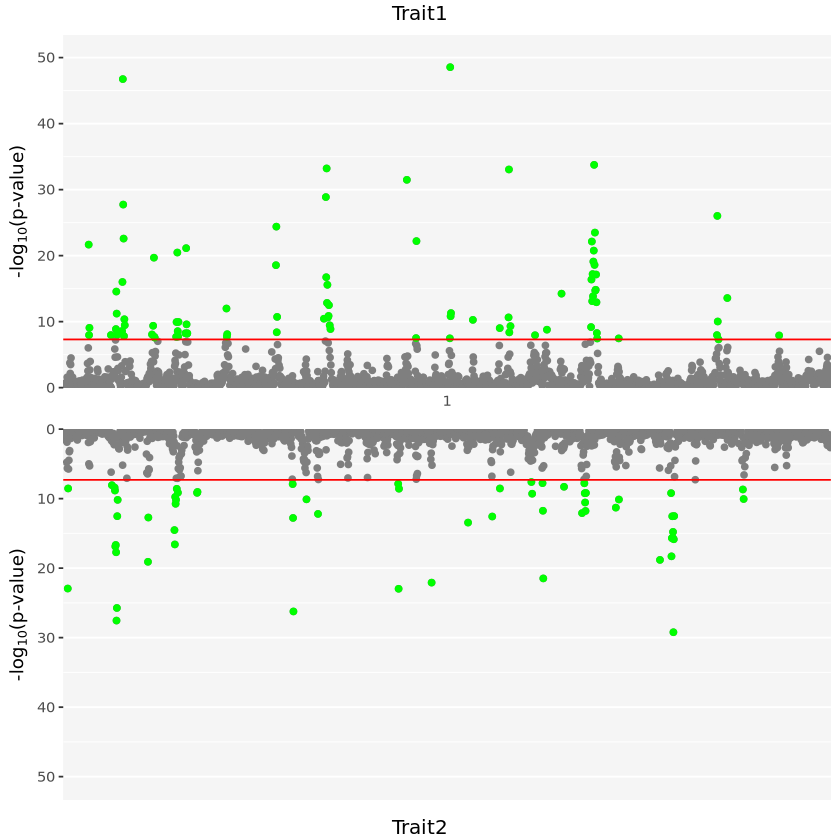

In [2]:
library(hudson)

dat1<-read.table("Trait1_snp.assoc.linear",header=T)
dat2<-read.table("Trait2_snp.assoc.linear",header=T)
names(dat1)<-c("CHR", "SNP", "POS", "A1", "TEST", "NMISS", "BETA", "STAT", "pvalue")
names(dat2)<-(names(dat1))
gmirror(top=dat1, bottom=dat2, tline=5e-08, bline=5e-08,
    toptitle="Trait1", bottomtitle = "Trait2",
    highlight_p = c(0.00000005,0.00000005), highlighter="green",
    file = 'pleiotropy_hudson', res = 300, type = 'pdf')

Trait1 <- read.table("Trait1_snp.assoc.linear", header = T)
Trait2 <- read.table("Trait2_snp.assoc.linear", header = T)
SigTrait1 <- subset(Trait1, P<0.00000005)
SigTrait2 <- subset(Trait2, P<0.00000005)
intersect(SigTrait1$SNP, SigTrait2$SNP)

In [ ]:
plink \
 --bfile pleiotropy_exercise\
 --clump Trait1_snp.assoc.linear,Trait2_snp.assoc.linear\
 --clump-kb 250\
 --clump-p1 5e-8\
 --clump-p2 5e-8\
 --clump-r2 0.2\
 --clump-replicate\
 --clump-verbose\
 --out Trait1_Trait2_clump

In [ ]:
plink.multivariate\
 --noweb\
 --bfile pleiotropy_exercise\
 --mult-pheno pleiotropy_exercise_phenotypes.txt\
 --sex\
 --mqfam\
 --out Trait1_Trait2

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Trait1_Trait2_clump.log.
Options in effect:
  --bfile pleiotropy_exercise
  --clump Trait1_snp.assoc.linear,Trait2_snp.assoc.linear
  --clump-kb 250
  --clump-p1 5e-8
  --clump-p2 5e-8
  --clump-r2 0.2
  --clump-replicate
  --clump-verbose
  --out Trait1_Trait2_clump

31376 MB RAM detected; reserving 15688 MB for main workspace.
2000 variants loaded from .bim file.
30000 people (14915 males, 15085 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 30000 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
2000 variants and 30000 people pass filters and QC.
Note

In [4]:
Trait1<-read.table("Trait1_snp.assoc.linear", header=T)
Trait2<-read.table("Trait2_snp.assoc.linear", header=T)
multi<-read.table("Trait1_Trait2.mqfam.total", header=T)
sigMulti<-subset(multi, P<0.00000005)
suggTrait1<-subset(Trait1, P<0.000005)
suggTrait2<-subset(Trait2, P<0.000005)
Reduce(intersect, list(suggTrait1$SNP, suggTrait2$SNP, sigMulti$SNP))

[1] "rs125"  "rs135"  "rs137"  "rs138"  "rs139"  "rs140"  "rs141"  "rs295" 
 [9] "rs296"  "rs298"  "rs299"  "rs300"  "rs920"  "rs921"  "rs923"  "rs1138"
[17] "rs1166" "rs1361" "rs1448"

In [5]:
plink \
 --bfile pleiotropy_exercise\
 --clump Trait1_snp.assoc.linear,Trait2_snp.assoc.linear\
 --clump-p1 0.000005\
 --clump-p2 0.000005\
 --clump-r2 0.2\
 --clump-replicate\
 --clump-verbose\
 --out Trait1_Trait2_clump_suggestive

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Trait1_Trait2_clump_suggestive.log.
Options in effect:
  --bfile pleiotropy_exercise
  --clump Trait1_snp.assoc.linear,Trait2_snp.assoc.linear
  --clump-p1 0.000005
  --clump-p2 0.000005
  --clump-r2 0.2
  --clump-replicate
  --clump-verbose
  --out Trait1_Trait2_clump_suggestive

31376 MB RAM detected; reserving 15688 MB for main workspace.
2000 variants loaded from .bim file.
30000 people (14915 males, 15085 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 30000 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
2000 variants and 30000 people pass filters